In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
d = 1.7*10**-3 #Meter
lamda = 632.8*10**-9 #golflengte

In [4]:
meet_N = [1, 3, 4, 6, 7, 9, 12, 14, 17, 22, 26, 32, 36, 41, 45, 53, 62]
meet_i = [1, 2, 3, 4, 5, 5.5, 6, 7, 8, 9, 10, 11, 11.5, 12, 13, 14, 15]

In [5]:
i_hoek = []
N = []
test1 = []
test2 = []
klaar = 0
kleine_kwadraten = []

In [6]:
n = 1.0 #Brekingsindex
klaar = 0 
aantal_keer = 0
kleine_kwadraten = []
for p in range(0, 100, 1):
    n = n + 0.02
    #print("N =" + str(n))
    N_2 = []
    i_hoek = []
    test1 = []
    for i in range(0, 31, 1):
        i = i / 2
        I = np.pi/180*i
        #print(i)
        N = 2*d/lamda*((n/np.cos(np.sin(I)/n))+np.tan(I)*np.sin(I)-np.tan(np.sin(I)/n)*np.sin(I)-(n-1)-(1/np.cos(I)))
        N_2.append(N)
        i_hoek.append(i)
        if (i in meet_i):
            index = meet_i.index(i)
            test1.append(abs(meet_N[index] - N))
            test2.append(i)
            klaar += 1
            if (klaar == len(meet_i)):
                kleine_kwadraten.append(sum(test1))
                aantal_keer += 1
                klaar = 0
                if (aantal_keer > 1):
                    if (kleine_kwadraten[aantal_keer-1] < kleine_kwadraten[aantal_keer-2]):
                        beste_n = n
                        beste_N = N_2
                        beste_i = i_hoek
                        #skreep = kleine_kwadraten[p]
                    #print("p =" + str(p) + "k_w =" + str(kleine_kwadraten[p]))
    #print("Totaal = " + str(p+1))


In [7]:
print("Brekingsindex = " + str(beste_n))

Brekingsindex = 1.4800000000000004


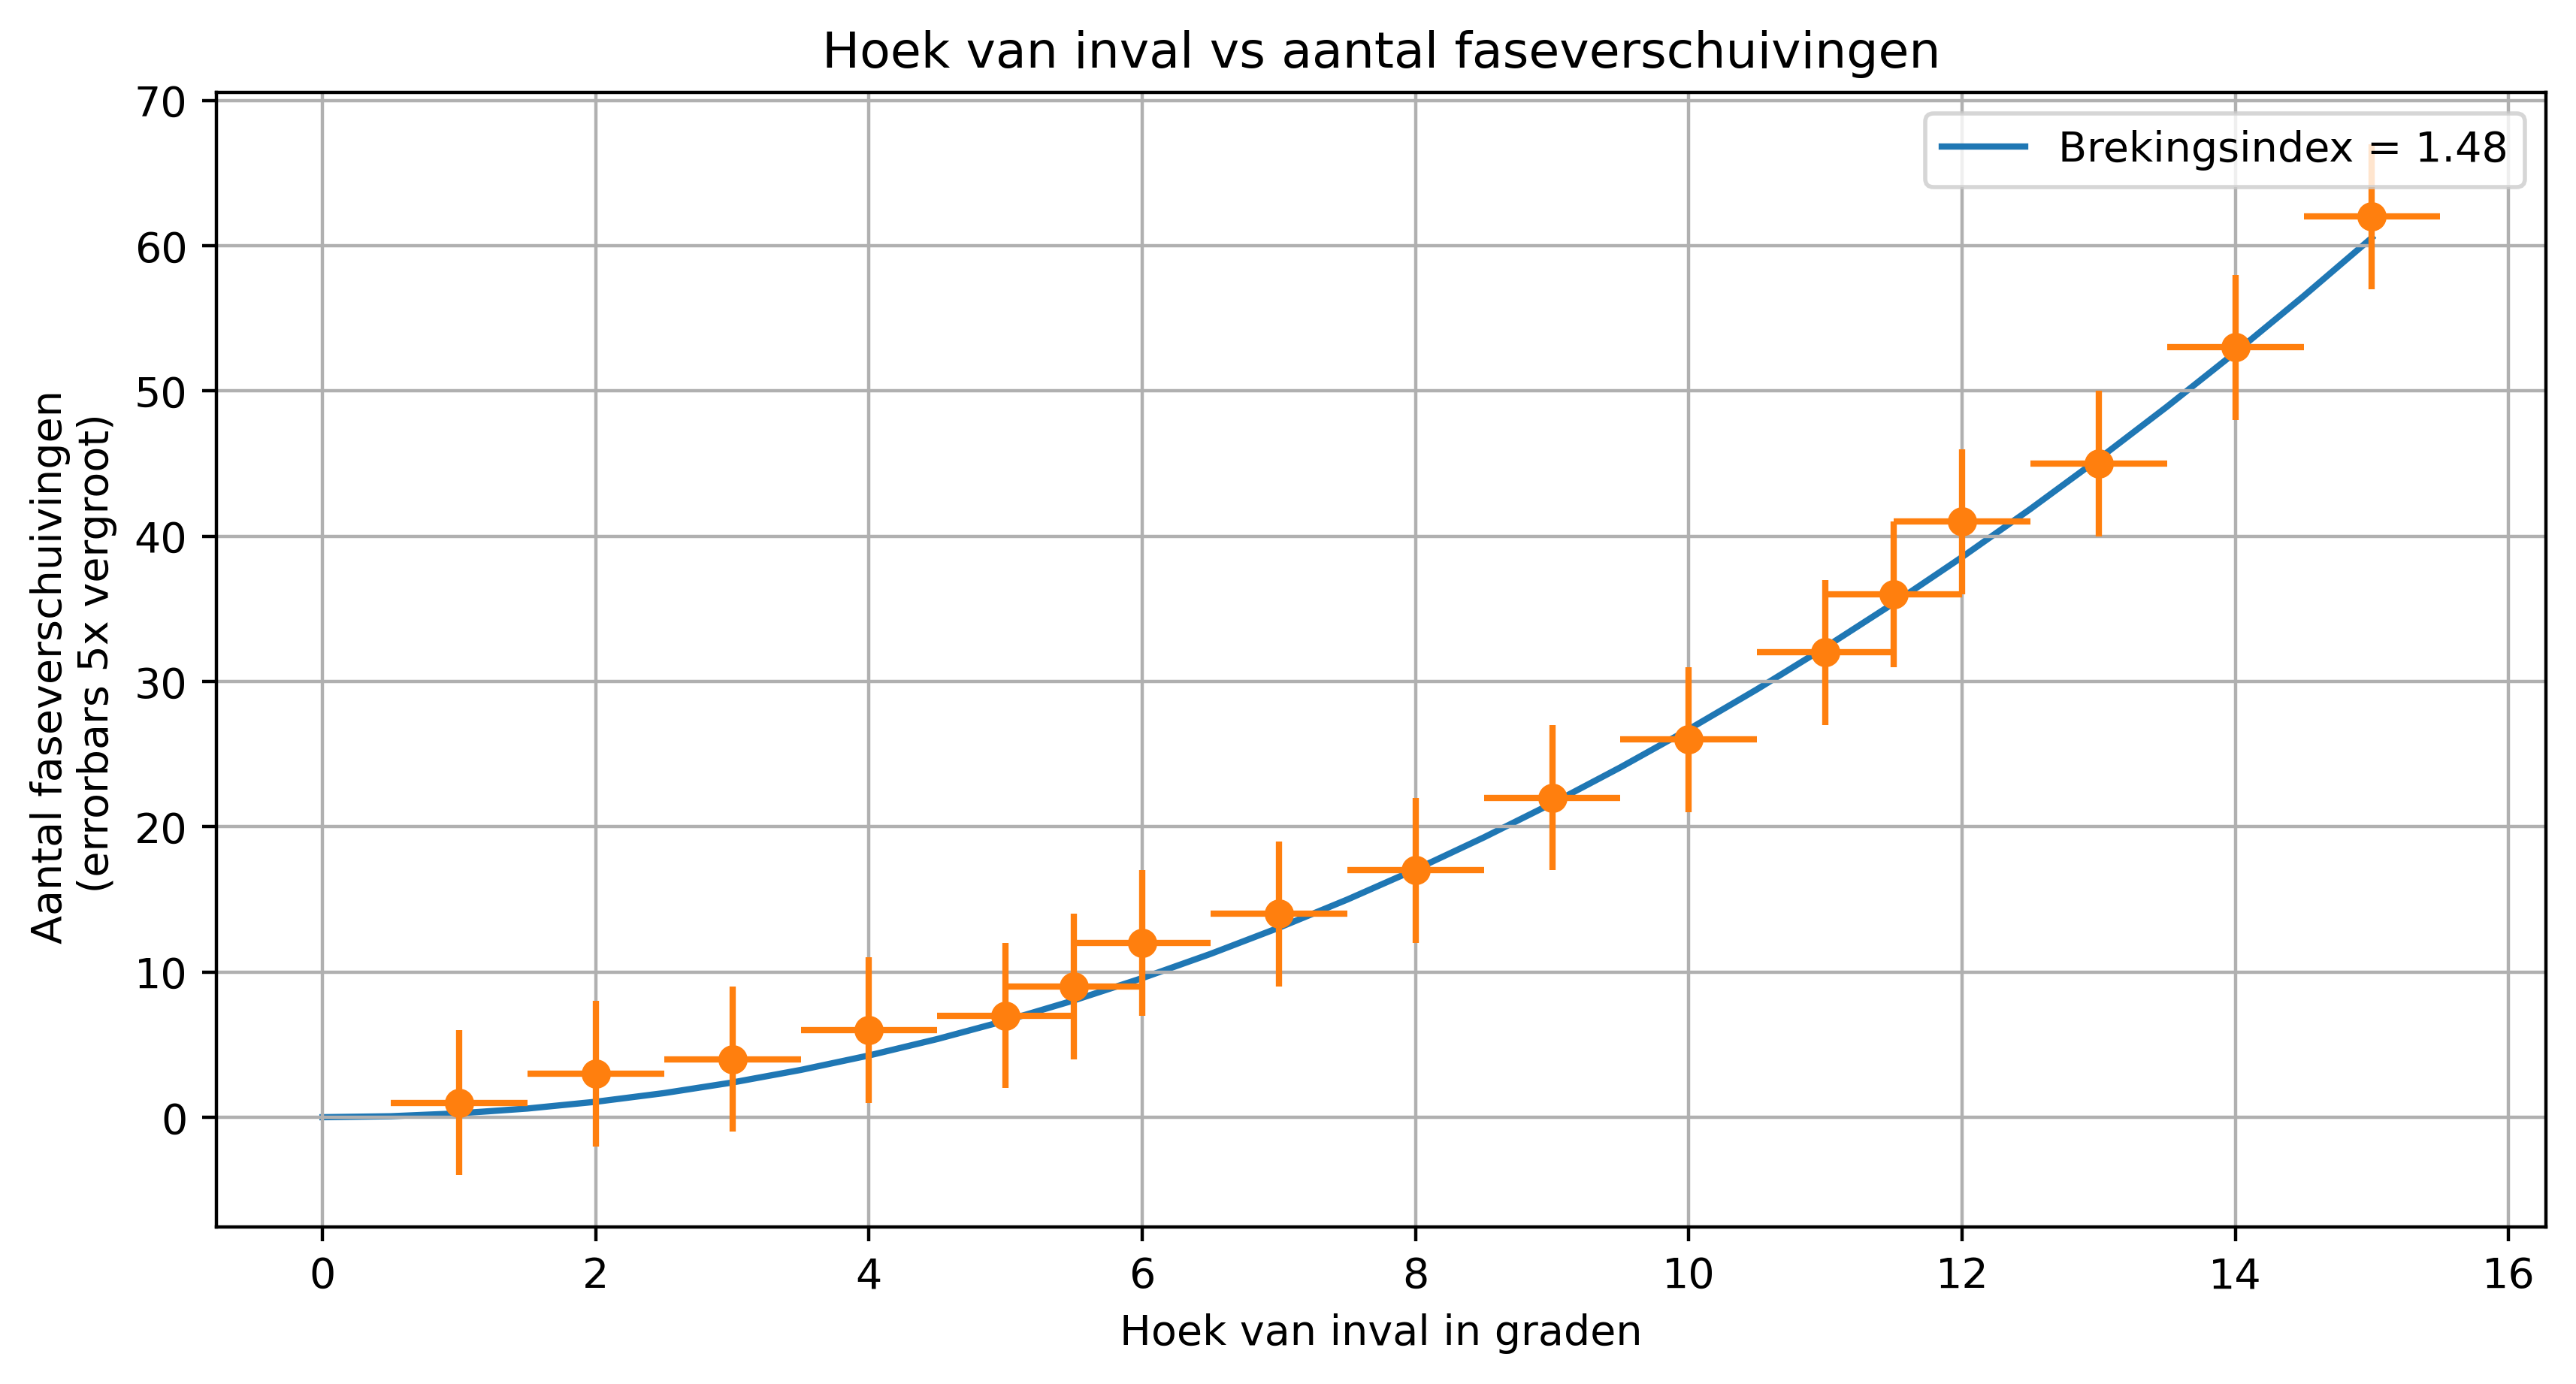

In [29]:
plt.figure(figsize=(10, 5), dpi=400)
plt.plot(beste_i, beste_N, zorder=1, label="Brekingsindex = " +str(round(beste_n,2)))
plt.errorbar(meet_i, meet_N, yerr = 5, xerr = 0.5, fmt = "o")
plt.title("Hoek van inval vs aantal faseverschuivingen")
plt.ylabel("Aantal faseverschuivingen \n (errorbars 5x vergroot)")
plt.xlabel("Hoek van inval in graden")
plt.grid()
plt.legend()
#plt.scatter(meet_i, meet_N, zorder=2)
plt.show()